In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Enable inline notebook plot using a magic function
%matplotlib inline

In [4]:
# Lets use the car mpg dataset for some real life action
header = ['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name' ]
auto_mpg = pd.read_csv('./data/auto-mpg.data', header=None, names=header, delim_whitespace=True)
print(auto_mpg.head())

print(auto_mpg.info())

   mpg  cyl  displ     hp  weight  accel  yr  origin  \
0   18    8    307  130.0    3504   12.0  70       1   
1   15    8    350  165.0    3693   11.5  70       1   
2   18    8    318  150.0    3436   11.0  70       1   
3   16    8    304  150.0    3433   12.0  70       1   
4   17    8    302  140.0    3449   10.5  70       1   

                        name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg       398 non-null float64
cyl       398 non-null int64
displ     398 non-null float64
hp        398 non-null object
weight    398 non-null float64
accel     398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
name      398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB
None


In [20]:
# Note the dataset has bad data for the field 'hp' which will need some cleaning
auto_mpg['hp'].unique()
# Let's cleanup bad data ? into 0.0
auto_mpg.replace(to_replace={'hp':{'?': '0.0'}}, inplace=True)

# Create a subset from the auto_mpg for plotting purpose
df = pd.DataFrame(auto_mpg[['hp', 'mpg']]).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 2 columns):
hp     398 non-null float64
mpg    398 non-null float64
dtypes: float64(2)
memory usage: 9.3 KB


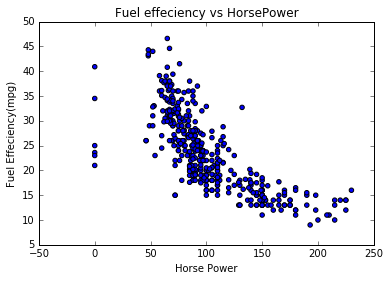

In [21]:
sizes = [20.0 for i in range(len(auto_mpg))]

df.plot(kind='scatter', x='hp', y='mpg', s=sizes)
plt.title('Fuel effeciency vs HorsePower')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Effeciency(mpg)')

# As you can see from the plot, there is an inverse relation between HorsePower and fuel effeciency

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c9fe818d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4ca0128438>], dtype=object)

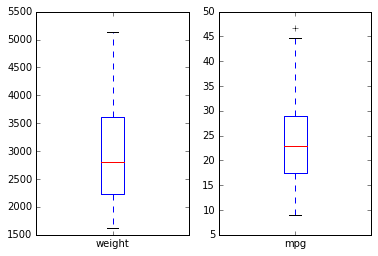

In [71]:
# We can do side by side plots called subplots
auto_mpg[['weight', 'mpg']].plot(kind='box', subplots=True)

In [26]:
# Let's compare the statistics at a global level
auto_mpg.describe()

,mpg,cyl,displ,weight,accel,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
# Let''s compare the stats by origin
auto_mpg[auto_mpg['origin']==1].describe()

,mpg,cyl,displ,weight,accel,yr,origin
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249
mean,20.083534,6.248996,245.901606,3361.931727,15.033735,75.610442,1
std,6.402892,1.661425,98.501839,794.792506,2.751112,3.677094,0
min,9.000000,4.000000,85.000000,1800.000000,8.000000,70.000000,1
25%,15.000000,4.000000,151.000000,2720.000000,13.000000,73.000000,1
50%,18.500000,6.000000,250.000000,3365.000000,15.000000,76.000000,1
75%,24.000000,8.000000,318.000000,4054.000000,16.900000,79.000000,1
max,39.000000,8.000000,455.000000,5140.000000,22.200000,82.000000,1
